<a href="https://colab.research.google.com/github/xyksoar/UTS_ML2019_ID13130760/blob/master/machine_learning_assig2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment2
## Google store applicaiton
### Haoran Li 13122852
### Yue Xiao 13130760



In [0]:
import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [0]:
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

In [0]:
from google.colab import files
uploaded = files.upload()


Saving googleplaystore.csv to googleplaystore.csv


In [0]:
%matplotlib inline

In [0]:
sns.set(style='darkgrid')
sns.set_palette('PuBuGn_d')

In [0]:
df = pd.read_csv('googleplaystore.csv')

In [0]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
# Checking the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [0]:
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [0]:
df = df[df.Category != '1.9']

In [0]:
df_catr = df.groupby('Category').count()['App'].sort_values(ascending = False).reset_index()
data = [go.Pie(
            values=df_catr['App'],
            labels=df_catr['Category'],
)]
layout = go.Layout(
    title = 'Category Distribution in App Store', 
)
fig = go.Figure(data = data , layout = layout)
iplot(fig, filename='Pie')

In [0]:
df_category = df.groupby('Category').count()['App'].reset_index()
df_category

,Category,App
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


In [0]:
print(df['Rating'].isna().sum())
df['Rating'].mean()

1474


4.191757420456978

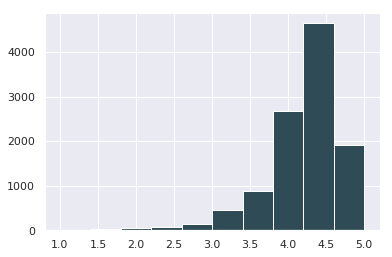

In [0]:
#fill the null values with the mean 
df['Rating'] = df.groupby('Category').transform(lambda x: x.fillna(x.mean()))['Rating']
df['Rating'].hist()
plt.show()

In [0]:
df.Rating.describe()

count    10840.000000
mean         4.190454
std          0.480075
min          1.000000
25%          4.047411
50%          4.259664
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [0]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

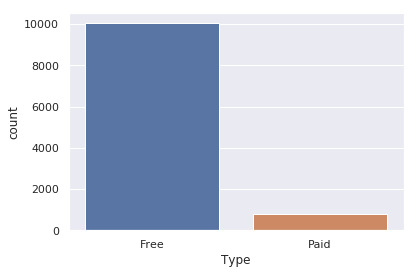

In [0]:
df.drop(df[df['Type'].isna()].index, inplace = True)
sns.set(style="darkgrid")
sns.countplot(x="Type", data = df)
plt.show()

In [0]:
df.Type.describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

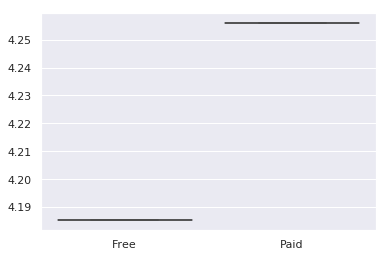

In [0]:
free_R=df[df.Type=='Free'].Rating.mean()
paid_R=df[df.Type!='Free'].Rating.mean()

sns.boxplot(x=['Free','Paid'],y=[free_R,paid_R])

In [0]:
df['Reviews'].isna().sum()
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Reviews'].describe()

count    1.083900e+04
mean     4.441939e+05
std      2.927893e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.478300e+04
max      7.815831e+07
Name: Reviews, dtype: float64

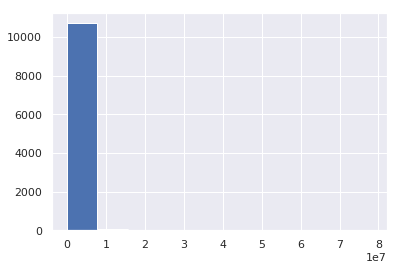

In [0]:
df['Reviews'].hist()

In [0]:
df[df['Reviews'] >= 30000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1704,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


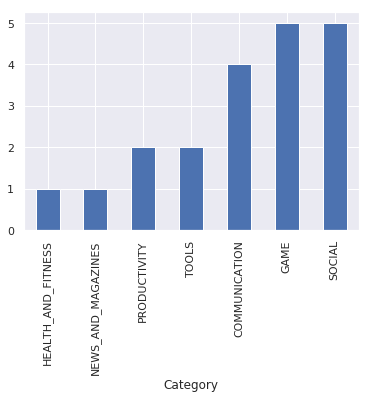

In [0]:
top_installed = df.sort_values(by = ['Installs'], ascending = False)[:20]
top_installed.groupby('Category')['App'].count().sort_values().plot.bar()

In [0]:
df_rating = df.groupby('Content Rating').count()['App'].reset_index()
df_rating

,Content Rating,App
0,Adults only 18+,3
1,Everyone,8714
2,Everyone 10+,413
3,Mature 17+,499
4,Teen,1208
5,Unrated,2


In [0]:
data = [go.Pie(
            values=df_rating['App'],
            labels=df_rating['Content Rating'],
#             orientation = 'h'
)]
layout = go.Layout(
    title = 'Number of Apps in different Content Rating', 
)
fig = go.Figure(data = data , layout = layout)
iplot(fig, filename='Pie')

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

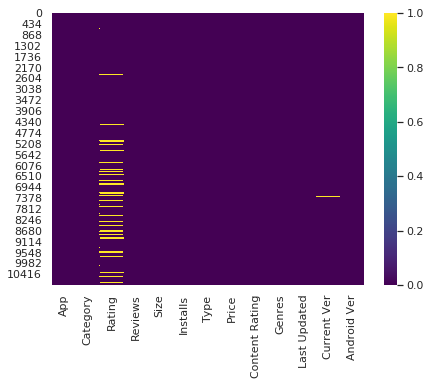

In [0]:
# Exploring missing data and checking if any has NaN values
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull(), cmap='viridis')
df.isnull().any()

In [0]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [0]:
# The best way to fill missing values might be using the median instead of mean.
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

In [0]:
# Count the number of unique values in category column 
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [0]:
# Check the record  of unreasonable value which is 1.9
i = df[df['Category'] == '1.9'].index
df.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0,NaN


In [0]:
# Drop this bad column
df = df.drop(i)

In [0]:
# Removing NaN values
df = df[pd.notnull(df['Last Updated'])]
df = df[pd.notnull(df['Content Rating'])]

# category to number

In [0]:
# App 
le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])
# This encoder converts the values into numeric values

In [0]:
# Category 
category_list = df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)

In [0]:
# Genres
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

In [0]:
# Content Rating
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])



In [0]:
# Price 
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [0]:
# Installs 
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [0]:
# Type 
df['Type'] = pd.get_dummies(df['Type'])

In [0]:
# Last Updated
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [0]:
# Convert kbytes to Mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [0]:
# Size 
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)

# divide into traing & testing

In [0]:
# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(category_list)
X = df[features]
y = df['Rating']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

# KNN

In [0]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [0]:
# Find the mean accuracy of knn regression using X_test and y_test
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [0]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 92.22%'

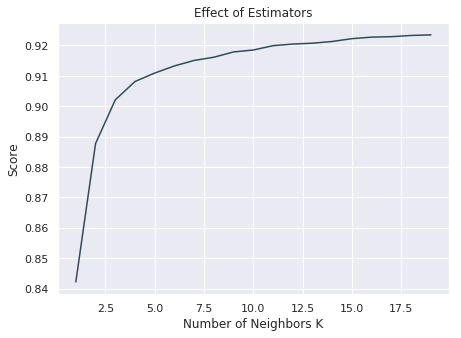

In [0]:
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

# Random Forest

[(10, 0.9294823581223036),
 (20, 0.9340764860548442),
 (30, 0.9363391155977434),
 (40, 0.9355069001490433),
 (50, 0.9372452369595285),
 (60, 0.9378328463259982),
 (70, 0.9379124106703021),
 (80, 0.9374982712760641),
 (90, 0.937832901540951),
 (100, 0.9380565562465011),
 (110, 0.9381645365500345),
 (120, 0.9380914588372382),
 (130, 0.9384733604980584),
 (140, 0.9383729051614925),
 (150, 0.9379558964247697),
 (160, 0.937436417431783),
 (170, 0.9381599122566118),
 (180, 0.9382424852749024),
 (190, 0.9383361135938001)]

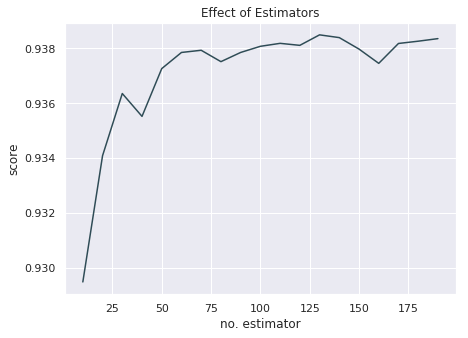

In [0]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [0]:
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.24136803262769493)

In [0]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 0.16089791354478641)

In [0]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.40112082162957635)

# Correlation

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr,spearmanr

[[0.10955411 0.15387645 0.73538593 0.98272359 0.44296204 0.71108965
  0.42482836 0.38173352 0.4717829  0.81808776 0.8550304  0.79590305
  0.72054127]
 [0.4690678  0.47629799 0.88812585 0.54520261 0.46450928 0.82326841
  0.48622377 0.4471349  0.55857693 0.96935258 0.1829391  0.84030943
  0.4104797 ]
 [0.91885376 0.0682899  0.10498044 0.25463657 0.21943    0.63570575
  0.26519549 0.29574916 0.17947452 0.53772204 0.66379961 0.3673653
  0.60358635]
 [0.4284208  0.51906571 0.86053676 0.76614144 0.38115161 0.96675362
  0.80524625 0.50508626 0.23516599 0.42243163 0.47722436 0.88470507
  0.86866024]
 [0.14878475 0.2854223  0.04883874 0.31813431 0.72759631 0.52070826
  0.89822846 0.6903845  0.99012872 0.4291678  0.27704934 0.57639675
  0.24372985]
 [0.83946251 0.94934042 0.93371562 0.96940402 0.17616101 0.12451441
  0.99751941 0.61781458 0.51915725 0.52659979 0.51972322 0.96788854
  0.59673411]
 [0.79201452 0.50782461 0.25736011 0.76487459 0.3354068  0.371235
  0.55642576 0.46404633 0.61228266 

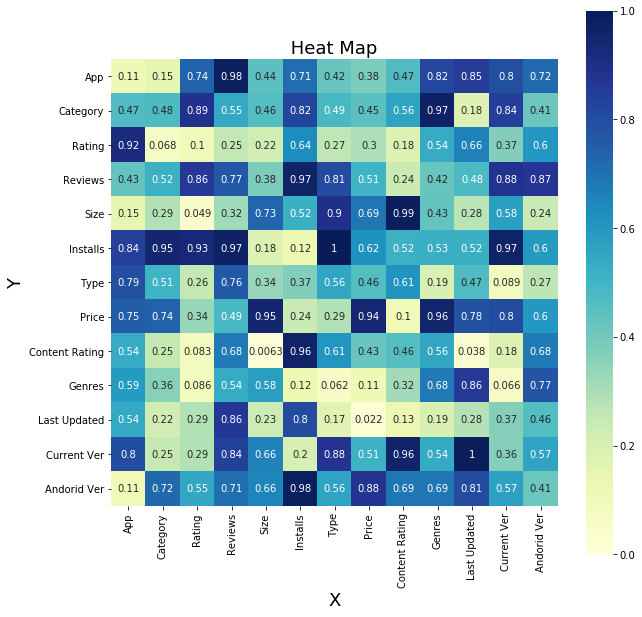

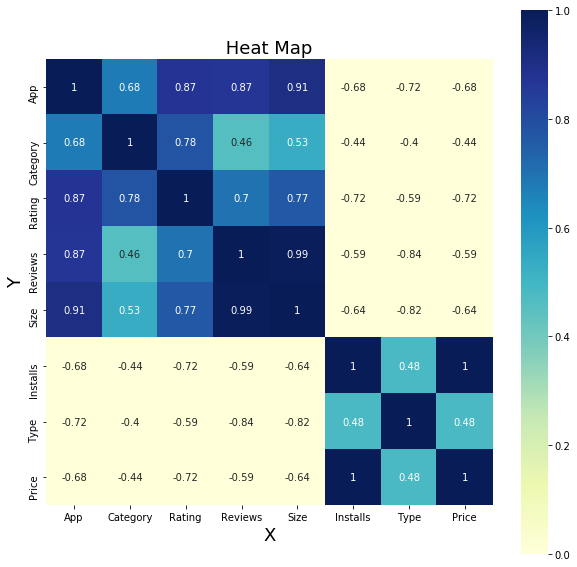

In [0]:
def randomPlot():

    data=np.random.rand(13,13)
    print(data)
    fig,ax=plt.subplots(figsize=(10,10))
    key_list=['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Andorid Ver']
    sns.heatmap(pd.DataFrame(np.round(data,4),columns=key_list,index=key_list),annot=True,vmax=1,vmin=0,xticklabels=True, 
                             yticklabels=True,square=True,cmap="YlGnBu")
    ax.set_title(' Heat Map ', fontsize=18)
    ax.set_ylabel('Y', fontsize=18)
    ax.set_xlabel('X', fontsize=18)
    plt.savefig('Random.png')
 

def dataPlot():
   
    data1=[[1.0, 0.679138216972867, 0.8723347117585479, 0.8678591195124671, 0.9091565423610072, -0.681888271075189, -0.7228630059512009, -0.681888271075189], [0.679138216972867, 1.0, 0.7808137626700863, 0.45749648218056993, 0.5348626411851899, -0.44326149230111495, -0.39558814315535173, -0.44326149230111495], [0.8723347117585479, 0.7808137626700863, 1.0, 0.7020628568851344, 0.7658545326255977, -0.7217424383082518, -0.5875065812285509, -0.7217424383082518], [0.8678591195124671, 0.45749648218056993, 0.7020628568851344, 1.0, 0.9903366506522474, -0.5874500887255807, -0.8382341966002466, -0.5874500887255807], [0.9091565423610072, 0.5348626411851899, 0.7658545326255977, 0.9903366506522474, 1.0, -0.6439505593700681, -0.8244259230387567, -0.6439505593700681], [-0.681888271075189, -0.44326149230111495, -0.7217424383082518, -0.5874500887255807, -0.6439505593700681, 1.0, 0.4821038714558963, 1.0], [-0.7228630059512009, -0.39558814315535173, -0.5875065812285509, -0.8382341966002466, -0.8244259230387567, 0.4821038714558963, 1.0, 0.4821038714558963], [-0.681888271075189, -0.44326149230111495, -0.7217424383082518, -0.5874500887255807, -0.6439505593700681, 1.0, 0.4821038714558963, 1.0]]
    data2=[[0.9999999999999999, 0.8345554576233073, 0.9243854856819417, 0.9330027648545496, 0.9482209505391218, -0.6482501837911674, -0.8818546914603946, -0.6482501837911674], [0.8345554576233073, 0.9999999999999999, 0.9003585423988755, 0.7649830893396171, 0.7979521001324441, -0.4691190784521079, -0.6480284658216039, -0.4691190784521079], [0.9243854856819417, 0.9003585423988756, 1.0, 0.8506386730833658, 0.8830994621736679, -0.7006298478257242, -0.7676395373967932, -0.7006298478257242], [0.9330027648545496, 0.7649830893396171, 0.8506386730833659, 0.9999999999999999, 0.9951726440650351, -0.5278605167290854, -0.9273089460158745, -0.5278605167290854], [0.9482209505391219, 0.7979521001324442, 0.8830994621736679, 0.9951726440650353, 1.0, -0.5724194583833783, -0.9112198965249181, -0.5724194583833783], [-0.6482501837911674, -0.46911907845210793, -0.7006298478257242, -0.5278605167290855, -0.5724194583833783, 1.0, 0.49515922475047763, 1.0], [-0.8818546914603947, -0.6480284658216039, -0.7676395373967932, -0.9273089460158744, -0.9112198965249181, 0.49515922475047763, 1.0, 0.49515922475047763], [-0.6482501837911674, -0.46911907845210793, -0.7006298478257242, -0.5278605167290855, -0.5724194583833783, 1.0, 0.49515922475047763, 1.0]]
    data3=[[1.0, 0.6447733742285494, 0.7648449086941359, 0.7781871747188993, 0.8077705036447606, -0.45314582645069557, -0.7063398069618333, -0.45314582645069557], [0.6447733742285494, 1.0, 0.723107089412363, 0.5724058545087037, 0.6071562414937144, -0.3151362329600627, -0.47203186715609546, -0.3151362329600627], [0.7648449086941359, 0.7231070894123629, 1.0, 0.6636168802979515, 0.7036503531839524, -0.5094145396347782, -0.5801992046091554, -0.5094145396347782], [0.7781871747188993, 0.5724058545087037, 0.6636168802979514, 1.0, 0.9417388451103401, -0.35110754201106087, -0.818036667286979, -0.35110754201106087], [0.8077705036447606, 0.6071562414937144, 0.7036503531839524, 0.9417388451103401, 1.0, -0.3871446641295609, -0.7851151107221745, -0.3871446641295609], [-0.45314582645069557, -0.3151362329600627, -0.5094145396347782, -0.35110754201106087, -0.3871446641295609, 1.0, 0.331222719795913, 1.0], [-0.7063398069618333, -0.4720318671560954, -0.5801992046091554, -0.818036667286979, -0.7851151107221744, 0.331222719795913, 1.0, 0.331222719795913], [-0.45314582645069557, -0.3151362329600627, -0.5094145396347782, -0.35110754201106087, -0.3871446641295609, 1.0, 0.331222719795913, 1.0]]
    data1,data2,data3=np.array(data1),np.array(data2),np.array(data3)
    fig,ax=plt.subplots(figsize=(10,10))
    key_list=['App','Category','Rating','Reviews','Size','Installs','Type','Price']
    sns.heatmap(pd.DataFrame(np.round(data1,4),columns=key_list,index=key_list),annot=True,vmax=1,vmin=0,xticklabels=True,
                             yticklabels=True,square=True,cmap="YlGnBu")
    ax.set_title(' Heat Map ', fontsize=18)
    ax.set_ylabel('Y', fontsize=18)
    ax.set_xlabel('X', fontsize=18)
    plt.savefig('data1.png')
 
 
if __name__=='__main__':
    randomPlot()
    dataPlot()